In [13]:
from datasets import load_dataset
import pandas as pd

data = load_dataset("xtreme", "tatoeba.rus",
                    split="validation")
pd.DataFrame(data)[["source_sentence", "target_sentence"]]

,source_sentence,target_sentence
0,"Я знаю много людей, у которых нет прав.\n",I know a lot of people who don't have driver's...
1,"У меня много знакомых, которые не умеют играть...",I know a lot of people who don't know how to p...
2,Мой начальник отпустил меня сегодня пораньше.\n,My boss let me leave early today.\n
3,Я загорел на пляже.\n,I tanned myself on the beach.\n
4,Вы сегодня проверяли почту?\n,Have you checked your email today?\n
...,...,...
995,Что сказал врач?\n,What did the doctor say?\n
996,"Я рад, что ты сегодня здесь.\n",I'm glad you're here today.\n
997,"Фермеры пригнали в деревню пять волов, девять ...",The farmers had brought five oxen and nine cow...
998,Жужжание пчёл заставляет меня немного нервнича...,The buzzing of the bees makes me a little nerv...


In [14]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("stsb-xlm-r-multilingual")
K = 30
q = data["source_sentence"][:K] + data["target_sentence"][:K]
emb = model.encode(q)
len(emb), len(emb[0])

(60, 768)

c:\Users\idirt\Anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


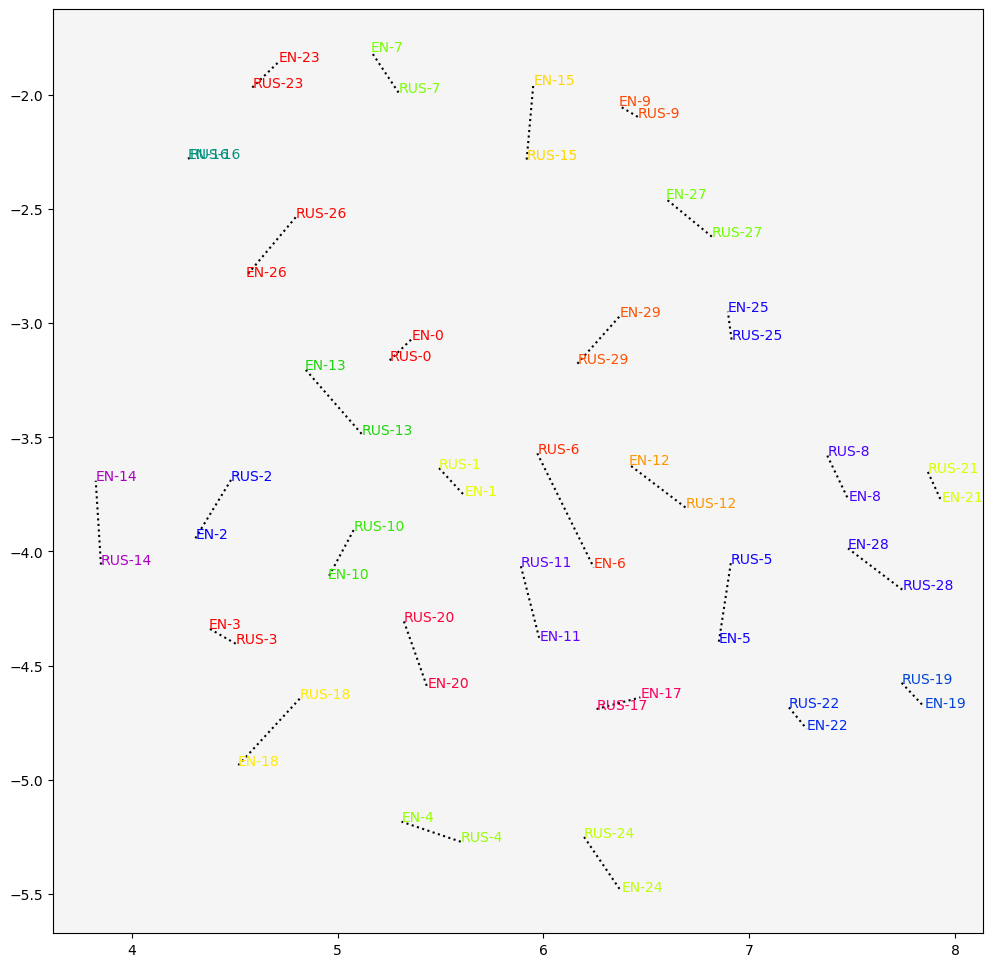

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap
import pylab
X = umap.UMAP(n_components=2, random_state=42).fit_transform(emb)
idx = np.arange(len(emb))
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('whitesmoke')
cm = pylab.get_cmap("prism")
colors = list(cm(1.0*i/K) for i in range(K))
for i in idx:
    if i < K:
        ax.annotate("RUS-"+str(i),  # text
                    (X[i, 0], X[i, 1]),  # coordinates
                    c=colors[i])  # color
        ax.plot((X[i, 0], X[i+K, 0]), (X[i, 1], X[i+K, 1]), "k:")
    else:
        ax.annotate("EN-"+str(i % K), (X[i, 0], X[i, 1]), c=colors[i % K])

In [16]:
source_emb = model.encode(data["source_sentence"])
target_emb = model.encode(data["target_sentence"])

# Гистограмма сходства пар предложений

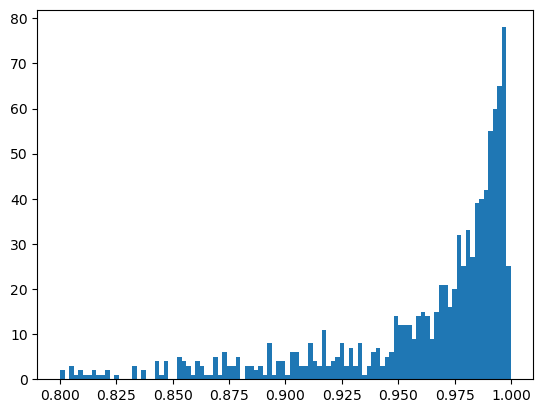

In [17]:
from scipy import spatial
sims = [1 - spatial.distance.cosine(s, t)
        for s, t in zip(source_emb, target_emb)]
plt.hist(sims, bins=100, range=(0.8, 1))
plt.show()